## Desafio - Módulo 4

In [1]:
# importando as bibliotecas
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
print('tensorflow version:', tf.__version__)

tensorflow version: 2.4.1


In [2]:
# parâmetros
batch_size = 32
num_classes = 5
epochs = 5
IMAGE_SHAPE = (224, 224, 3)

In [5]:
# download do dataset
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', 
                                   fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [6]:
# verificando a quantidade de imagens do dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images:", image_count)

Number of images: 3670


In [7]:
# selecionando as classes do dataset (tipos de flores) excluindo o arquivo LICENSE.txt
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

In [8]:
# dividindo o dataset em treino e teste
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.1)
image_count_train = image_count * 0.9
image_count_test = image_count * 0.1

In [11]:
# conjunto de treino
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir), batch_size=batch_size,
                                                    classes=list(CLASS_NAMES), target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
                                                    shuffle=True, subset="training")

# conjunto de teste
test_data_gen = image_generator.flow_from_directory(directory=str(data_dir), batch_size=batch_size, 
                                                    classes=list(CLASS_NAMES), target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
                                                    shuffle=True, subset="validation")

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [12]:
sample_training_images, sample_training_labels = next(train_data_gen)

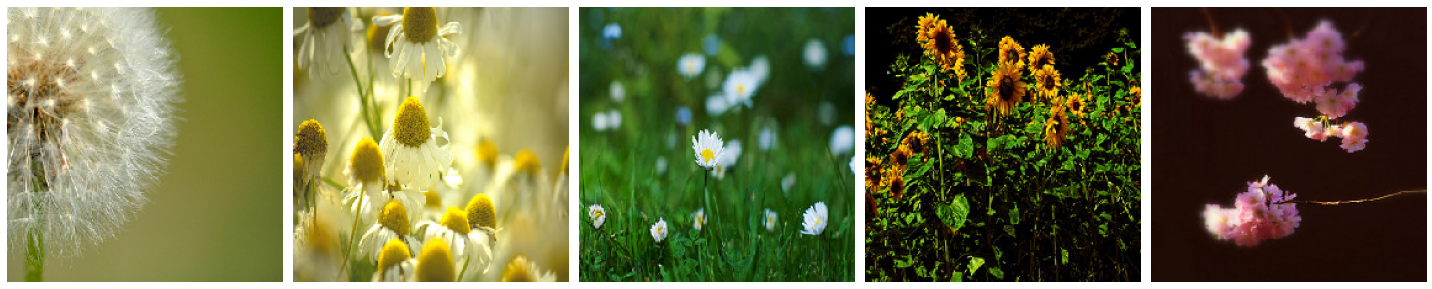

In [13]:
# plotando imagens exemplos
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

In [14]:
# criando o modelo
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', input_shape=IMAGE_SHAPE, activation='relu', name='conv_1'))
model.add(Conv2D(128, (3,3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
model.add(Conv2D(64, (3,3), activation='relu', name='conv_4'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), padding='same', activation='relu', name='conv_5'))
model.add(Conv2D(32, (3,3), activation='relu', name='conv_6'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(num_classes, name='output'))
model.add(Activation('softmax'))

In [15]:
# compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# mostrando o modelo gerado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
conv_2 (Conv2D)              (None, 222, 222, 128)     147584    
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 111, 111, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 128)     0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 111, 111, 64)      73792     
_________________________________________________________________
conv_4 (Conv2D)              (None, 109, 109, 64)      36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 54, 54, 64)        0

In [17]:
# treinando o modelo
history = model.fit(train_data_gen, 
                    steps_per_epoch=image_count_train // batch_size,
                    epochs=epochs, 
                    validation_data=test_data_gen, 
                    validation_steps=image_count_test // batch_size)

Epoch 1/5
103/103 [==============================] - 38s 323ms/step - loss: 1.5255 - accuracy: 0.3002 - val_loss: 1.3562 - val_accuracy: 0.3949
Epoch 2/5
103/103 [==============================] - 32s 315ms/step - loss: 1.1947 - accuracy: 0.5174 - val_loss: 1.1916 - val_accuracy: 0.5057
Epoch 3/5
103/103 [==============================] - 33s 323ms/step - loss: 1.0153 - accuracy: 0.5915 - val_loss: 1.2296 - val_accuracy: 0.5483
Epoch 4/5
103/103 [==============================] - 34s 330ms/step - loss: 0.8909 - accuracy: 0.6672 - val_loss: 1.4590 - val_accuracy: 0.5455
Epoch 5/5
103/103 [==============================] - 34s 325ms/step - loss: 0.7292 - accuracy: 0.7356 - val_loss: 1.4021 - val_accuracy: 0.5597


In [18]:
# verificando a acurácia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# verificando a perda loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

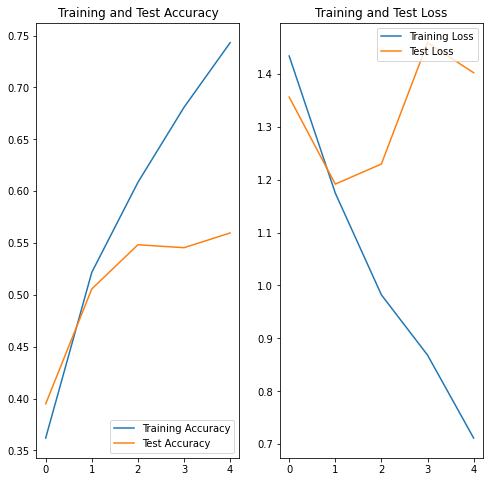

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [20]:
# selecionando as imagens do conjunto de teste
sample_test_images, sample_test_labels = next(test_data_gen)
sample_test_labels = [CLASS_NAMES[np.argmax(sample_test_labels[i])] for i in range(batch_size)]

In [21]:
# predição das imagens no modelo
predicted_class_names = model.predict(sample_test_images)
predicted_ids = [np.argmax(predicted_class_names[i]) for i in range(batch_size)]

In [22]:
# encontrando as classes da predição
predicted_class_names = np.array([CLASS_NAMES[id] for id in predicted_ids])

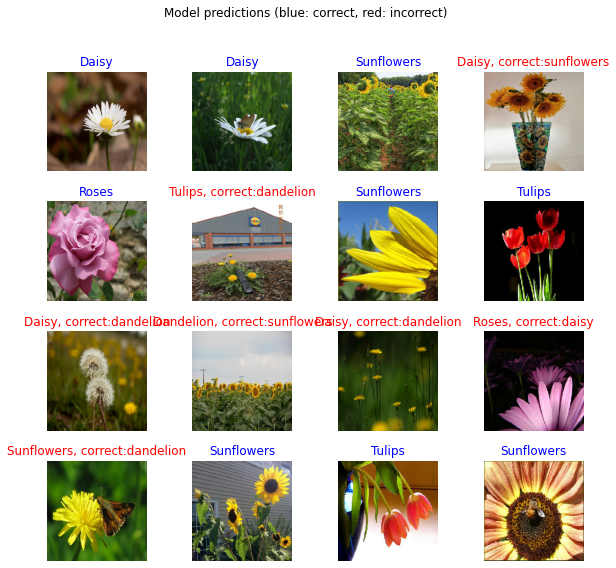

In [23]:
# plotando alguns exemplos
plt.figure(figsize=(10,9))
for n in range(16):
    plt.subplot(4,4,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(sample_test_images[n])
    if predicted_class_names[n] == sample_test_labels[n]:
        color = "blue"
        title = predicted_class_names[n].title()
    else:
        color = "red"
        title = f"{predicted_class_names[n].title()}, correct:{sample_test_labels[n]}"
    plt.title(title, color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")
plt.show()

In [24]:
# criando o modelo
hub_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4", 
                           trainable=False, arguments=dict(batch_norm_momentum=0.997))
hub_layer.build([None, 224, 224, 3])

model = Sequential()
model.add(InputLayer(input_shape=IMAGE_SHAPE))
model.add(hub_layer)
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(num_classes, name='output'))
model.add(Activation('softmax'))

In [25]:
# compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# mostrando o modelo gerado
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              25615849  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               513024    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 5)                 645       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 26,195,182
Trainable params: 579,333
Non-trainable params: 25,615,849
____________________________________

In [27]:
# treinando o modelo
history = model.fit(train_data_gen,
                    steps_per_epoch=image_count_train // batch_size,
                    epochs=epochs,
                    validation_data=test_data_gen,
                    validation_steps=image_count_test // batch_size)

Epoch 1/5
103/103 [==============================] - 18s 145ms/step - loss: 0.8450 - accuracy: 0.7156 - val_loss: 0.4417 - val_accuracy: 0.8494
Epoch 2/5
103/103 [==============================] - 15s 141ms/step - loss: 0.2635 - accuracy: 0.9035 - val_loss: 0.4102 - val_accuracy: 0.8636
Epoch 3/5
103/103 [==============================] - 14s 138ms/step - loss: 0.1961 - accuracy: 0.9286 - val_loss: 0.4172 - val_accuracy: 0.8494
Epoch 4/5
103/103 [==============================] - 14s 139ms/step - loss: 0.1294 - accuracy: 0.9581 - val_loss: 0.5073 - val_accuracy: 0.8466
Epoch 5/5
103/103 [==============================] - 14s 137ms/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.5381 - val_accuracy: 0.8693


In [28]:
# verificando a acurácia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# verificando a perda loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

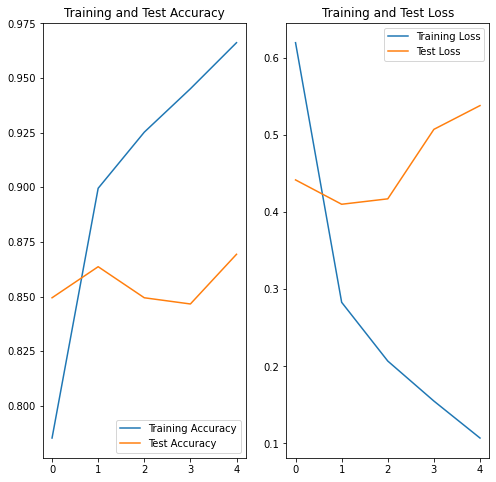

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [30]:
# selecionando as imagens do conjunto de teste
sample_test_images, sample_test_labels = next(test_data_gen)
sample_test_labels = [CLASS_NAMES[np.argmax(sample_test_labels[i])] for i in range(batch_size)]

In [31]:
# predição das imagens no modelo
predicted_class_names = model.predict(sample_test_images)
predicted_ids = [np.argmax(predicted_class_names[i]) for i in range(batch_size)]

In [32]:
# encontrando as classes da predição
predicted_class_names = np.array([CLASS_NAMES[id] for id in predicted_ids])

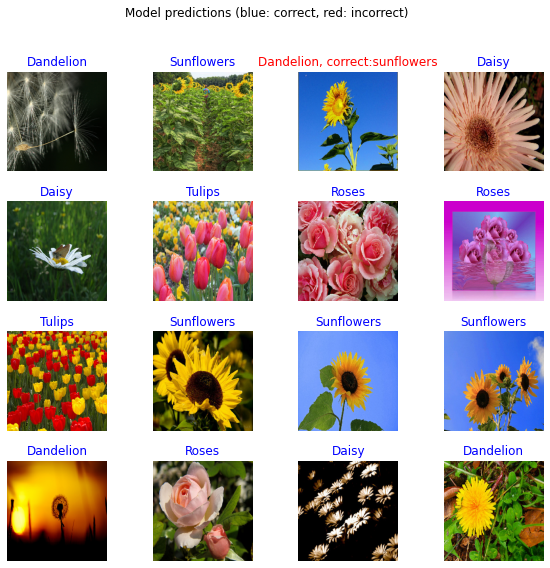

In [33]:
# plotando alguns exemplos
plt.figure(figsize=(10,9))
for n in range(16):
    plt.subplot(4,4,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(sample_test_images[n])
    if predicted_class_names[n] == sample_test_labels[n]:
        color = "blue"
        title = predicted_class_names[n].title()
    else:
        color = "red"
        title = f"{predicted_class_names[n].title()}, correct:{sample_test_labels[n]}"
    plt.title(title, color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")
plt.show()